## Exercise 1) 
Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
<br>
<br>
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
<br>
<br>
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
<br>
<br>
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [1]:
#imports needed to read in dataset
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#creating a dataframe with the dataset
df_lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
#checking out what the dataframe looks like
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.00,2.00,15,0.50,10
1,1/2/17,Monday,28.90,1.33,15,0.50,13
2,1/3/17,Tuesday,34.50,1.33,27,0.50,15
3,1/4/17,Wednesday,44.10,1.05,28,0.50,17
4,1/5/17,Thursday,42.40,1.00,33,0.50,18


In [4]:
#learning what size the dataframe is:
df_lemonade.shape

(365, 7)

In [5]:
df_lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.00,365.00,365.00,365.00,365.00
mean,61.22,0.83,40.10,0.50,27.87
std,18.09,0.27,13.79,0.00,30.95
min,15.10,0.40,-38.00,0.50,7.00
25%,49.70,0.65,31.00,0.50,20.00
50%,61.10,0.74,39.00,0.50,25.00
75%,71.70,0.91,49.00,0.50,30.00
max,212.00,2.50,80.00,0.50,534.00


In [6]:
#looking at the stats numbers for the dataset:
df_lemonade.groupby("Date").describe()

Temperature                                                \
                       count                 mean std                  min   
Date                                                                         
1/1/17                  1.00                27.00 NaN                27.00   
1/10/17                 1.00                43.40 NaN                43.40   
1/11/17                 1.00                32.60 NaN                32.60   
1/12/17                 1.00                38.20 NaN                38.20   
1/13/17                 1.00                37.50 NaN                37.50   
...                      ...                  ...  ..                  ...   
9/5/17                  1.00                61.80 NaN                61.80   
9/6/17                  1.00                71.70 NaN                71.70   
9/7/17                  1.00                68.40 NaN                68.40   
9/8/17                  1.00                65.10 NaN                65.10   
9/9/17                  1.00                64.80 NaN                64.80   

                                                                        \
                         25%                  50%                  75%   
Date                                                                     
1/1/17                 27.00                27.00                27.00   
1/10/17                43.40                43.40                43.40   
1/11/17                32.60                32.60                32.60   
1/12/17                38.20                38.20                38.20   
1/13/17                37.50                37.50                37.50   
...                      ...                  ...                  ...   
9/5/17                 61.80                61.80                61.80   
9/6/17                 71.70                71.70                71.70   
9/7/17                 68.40                68.40                68.40   
9/8/17                 65.10                65.10                65.10   
9/9/17                 64.80                64.80                64.80   

                                         Rainfall                       ...  \
                         max                count                 mean  ...   
Date                                                                    ...   
1/1/17                 27.00                 1.00                 2.00  ...   
1/10/17                43.40                 1.00                 1.05  ...   
1/11/17                32.60                 1.00                 1.54  ...   
1/12/17                38.20                 1.00                 1.33  ...   
1/13/17                37.50                 1.00                 1.33  ...   
...                      ...                  ...                  ...  ...   
9/5/17                 61.80                 1.00                 0.71  ...   
9/6/17                 71.70                 1.00                 0.69  ...   
9/7/17                 68.40                 1.00                 0.67  ...   
9/8/17                 65.10                 1.00                 0.71  ...   
9/9/17                 64.80                 1.00                 0.77  ...   

                       Price                                     Sales  \
                         75%                  max                count   
Date                                                                     
1/1/17                  0.50                 0.50                 1.00   
1/10/17                 0.50                 0.50                 1.00   
1/11/17                 0.50                 0.50                 1.00   
1/12/17                 0.50                 0.50                 1.00   
1/13/17                 0.50                 0.50                 1.00   
...                      ...                  ...                  ...   
9/5/17                  0.50                 0.50                 1.00   
9/6/17                  0.50            

### Takeaways: 
min vs max:
- 1) temp: 15 vs 212
- 2) rainfall: 0.40 vs 2.5
- 3) flyers: -38 vs 80
- 4) price: 0.50 vs 0.50
- 5) sales: 7.00 vs 534.00

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Flyers'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

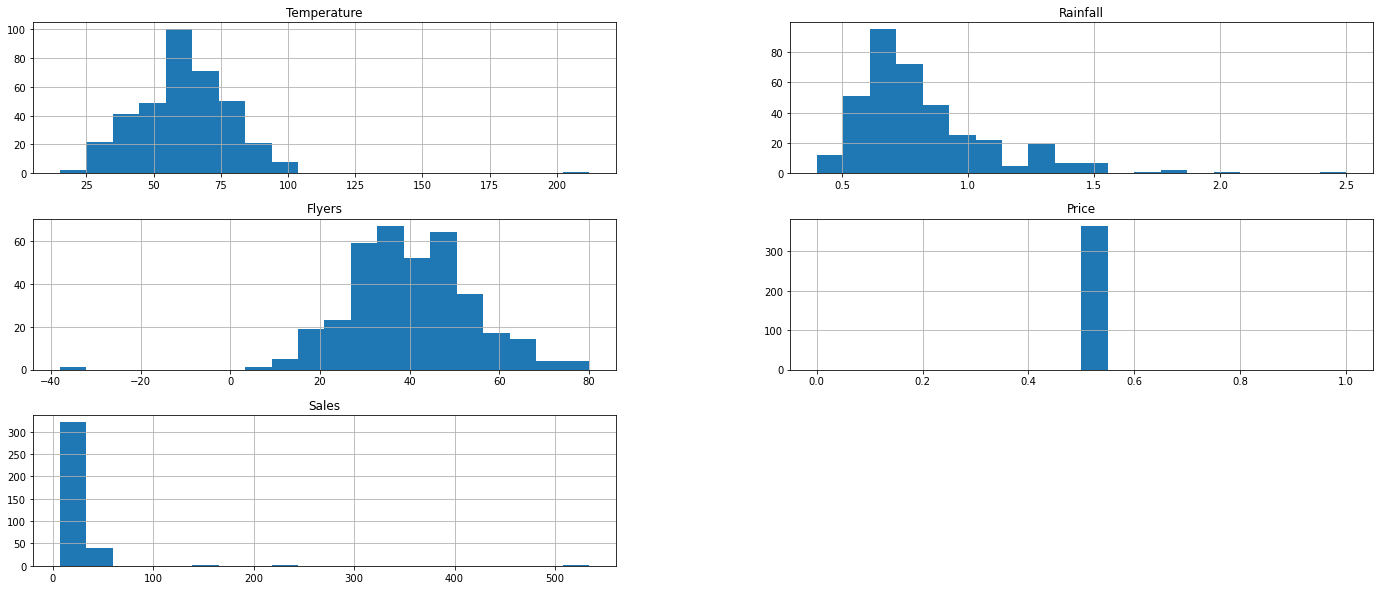

In [7]:
#looking at each variables distribution:
df_lemonade.hist(figsize=(24, 10), bins=20)

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5.<br><br> - Do these lower outliers make sense?<br><br> - Which outliers should be kept?

<AxesSubplot:>

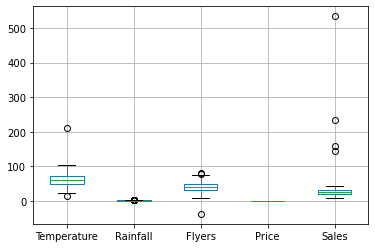

In [20]:
#using boxplots to visually see any anomolies/outliers:
df_lemonade.boxplot(column=['Temperature', 'Rainfall', 'Flyers','Price','Sales'])  

In [ ]:
##

In [8]:
#targeting 
df_lemonade.Temperature.describe()['25%']

49.7

In [9]:
def get_outliers(col, k):
    q1 = col.describe()['25%']
    q3 = col.describe()['75%']
    iqr = q3-q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    return upper_bound, lower_bound

In [10]:
def flag_outliers(df, col, k):
    lower_bound, upper_bound = get_outliers(df[col], k)
    df[f'outlier_{co}']='not_outlier'
    df.loc[df[col] < lower_bound, f'outlier_{col}_{k}']='lower_outlier'
    df.loc[df[col] > upper_bound, f"outlier_{col}"] = "upper_outlier"
    return df

In [11]:
lower, upper = get_outliers(df_lemonade.Temperature, k=1.5)

Text(0.5, 1.0, 'Histogram of Temperature with lower bounds (k=1.5) hued')

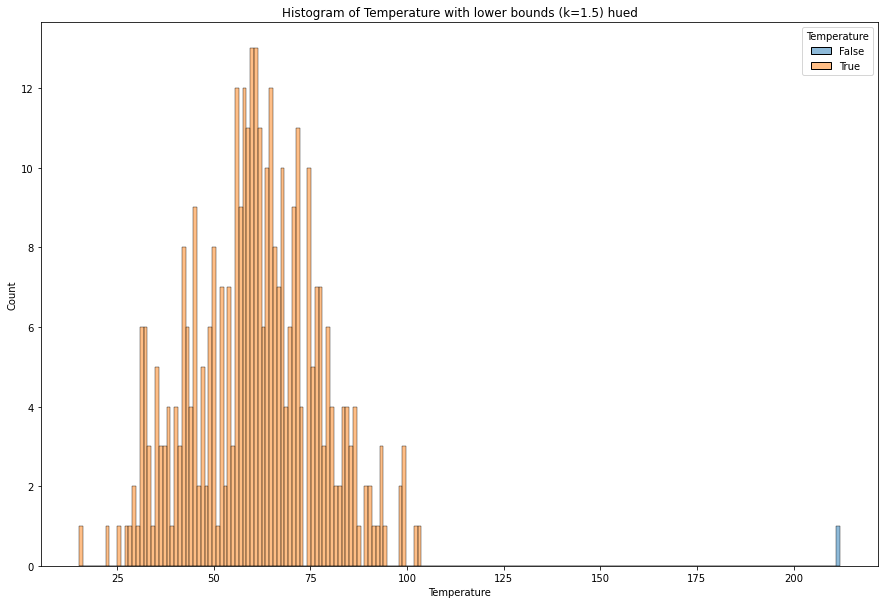

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(x=df_lemonade['Temperature'], hue=df_lemonade['Temperature'] < lower, bins = 200)
plt.title('Histogram of Temperature with lower bounds (k=1.5) hued')

<AxesSubplot:xlabel='Sales', ylabel='Flyers'>

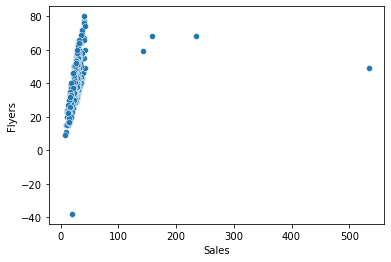

In [24]:
sns.scatterplot(data=df_lemonade, x="Sales", y="Flyers")

<AxesSubplot:xlabel='Temperature', ylabel='Sales'>

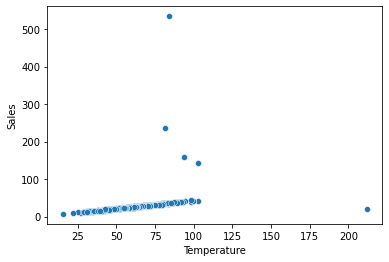

In [25]:
sns.scatterplot(data=df_lemonade, x="Temperature", y="Sales")

<AxesSubplot:xlabel='Temperature', ylabel='Rainfall'>

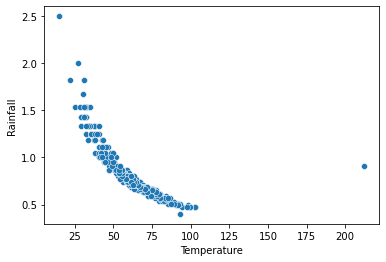

In [23]:
sns.scatterplot(data=df_lemonade, x="Temperature", y="Rainfall")

In [13]:
#using z-scores to first identify outliers:
#df = df_lemonade
#mean = np.mean(df)
#std = np.std(df)
#print('mean of the dataset is', mean)
#print('std.deviation is', std)


In [14]:
#creating upper IQR bounds
def get_upper_outliers(s, k):
    """K returns the upper outliers for series. Value will be 0 if 
    not outlier, or number that will indicate how far away from
    upper bounds"""
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))
    

In [15]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [16]:
add_upper_outlier_columns(df_lemonade,k=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outliers,Rainfall_outliers,Flyers_outliers,Price_outliers,Sales_outliers
0,1/1/17,Sunday,27.00,2.00,15,0.50,10,0.00,0.70,0.00,0.00,0.00
1,1/2/17,Monday,28.90,1.33,15,0.50,13,0.00,0.03,0.00,0.00,0.00
2,1/3/17,Tuesday,34.50,1.33,27,0.50,15,0.00,0.03,0.00,0.00,0.00
3,1/4/17,Wednesday,44.10,1.05,28,0.50,17,0.00,0.00,0.00,0.00,0.00
4,1/5/17,Thursday,42.40,1.00,33,0.50,18,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.70,1.00,33,0.50,19,0.00,0.00,0.00,0.00,0.00
361,12/28/17,Thursday,37.80,1.25,32,0.50,16,0.00,0.00,0.00,0.00,0.00
362,12/29/17,Friday,39.50,1.25,17,0.50,15,0.00,0.00,0.00,0.00,0.00
363,12/30/17,Saturday,30.90,1.43,22,0.50,13,0.00,0.13,0.00,0.00,0.00


In [17]:
outlier_cols = [col for col in df_lemonade if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df_lemonade[col][df_lemonade[col] > 0]
    print(data.describe())

~~~
Temperature_outliers
count                   1.00
mean                  107.30
std                      NaN
min                   107.30
25%                   107.30
50%                   107.30
75%                   107.30
max                   107.30
Name: Temperature_outliers, dtype: float64
~~~
Rainfall_outliers
count                  28.00
mean                    0.22
std                     0.26
min                     0.03
25%                     0.03
50%                     0.13
75%                     0.24
max                     1.20
Name: Rainfall_outliers, dtype: float64
~~~
Flyers_outliers
count                   2.00
mean                    2.50
std                     2.12
min                     1.00
25%                     1.75
50%                     2.50
75%                     3.25
max                     4.00
Name: Flyers_outliers, dtype: float64
~~~
Price_outliers
count                   0.00
mean                     NaN
std                      NaN
min       

In [18]:
#creating lower IQR bounds
def get_outliers(s, k):
    """K returns the lower outliers for series. Value will be 0 if 
    not outlier, or number that will indicate how far away from
    upper bounds"""
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q3 - k * iqr
    return s.apply(lambda x: max([x - lower_bound, 0]))

def add_lower_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_lower_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_low_outliers'] = get_lower_outliers(df[col], k)

    return df

In [19]:
add_lower_outlier_columns(df_lemonade, k=1.5)

NameError: name 'get_lower_outliers' is not defined

In [ ]:
outlier_cols = [col for col in df_lemonade if col.endswith('_low_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df_lemonade[col][df_lemonade[col] > 0]
    print(data.describe())